In [25]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df_list = []

for file in glob.glob("./*.csv"):
    df_list.append(pd.read_csv(file).rename(columns={"Unnamed: 0": "Iteration"}))

df = pd.concat(df_list)
df = df[df['Iteration'] <= 70]
df

,Iteration,All Data,Federated
0,0,0.803124,0.036440
1,1,0.834512,0.075252
2,2,0.822905,0.110329
3,3,0.834761,0.164035
4,4,0.827879,0.232467
...,...,...,...
66,66,0.849382,0.843225
67,67,0.849258,0.843699
68,68,0.849805,0.844066
69,69,0.849679,0.844502


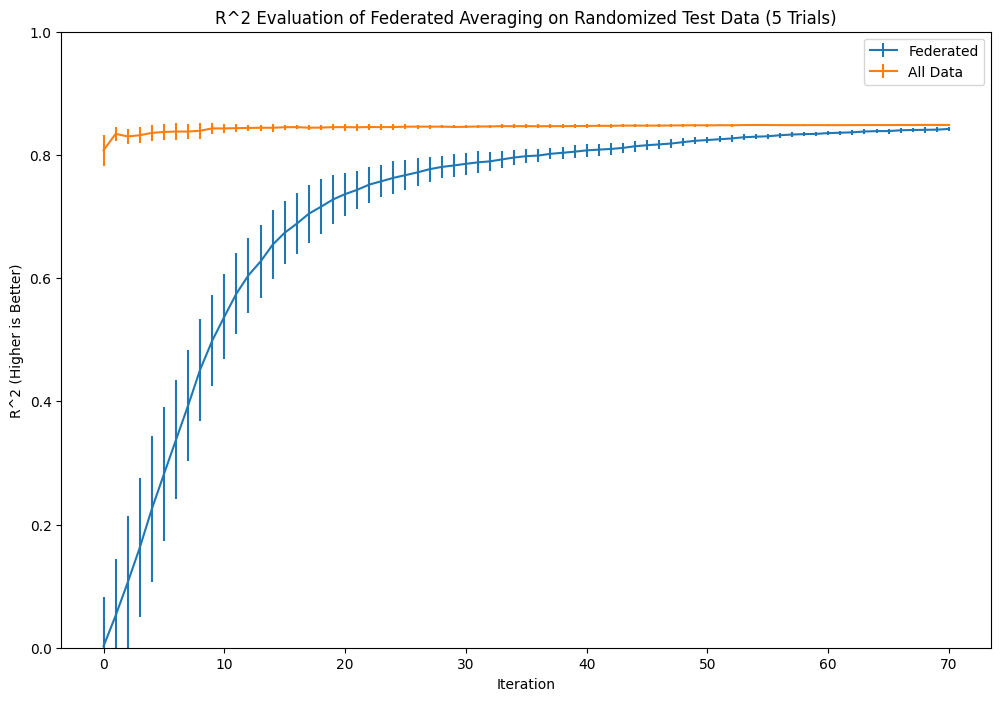

In [33]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))

ax.errorbar(np.arange(71), df.groupby("Iteration").mean()['Federated'], df.groupby("Iteration").std()['Federated'])
ax.errorbar(np.arange(71), df.groupby("Iteration").mean()['All Data'], df.groupby("Iteration").std()['All Data'])
ax.legend(['Federated', 'All Data'])

ax.set_xlabel("Iteration")
ax.set_ylabel("R^2 (Higher is Better)")
ax.set_title("R^2 Evaluation of Federated Averaging on Randomized Test Data (5 Trials)")
ax.set_ylim([0, 1])

plt.show()